In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [113]:
df1=pd.read_csv('./Bejaia Region ForestFire Dataset.csv')
df2=pd.read_csv('./Sidi-Bel Abbes Region ForestFire Dataset.csv')
df1['Region']=0
df2['Region']=1

In [114]:
df= pd.concat([df1,df2])

In [115]:
df.shape

(244, 15)

In [116]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
118,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 30.5+ KB


In [118]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [119]:
df=df.dropna().reset_index(drop=True)

In [120]:
objs= [f for f in df.columns if df[f].dtype=='O']

In [121]:
objs

['DC', 'FWI', 'Classes  ']

In [122]:
df[objs[0]]=df[objs[0]].astype('float')
df[objs[1]]=df[objs[1]].astype('float')

In [123]:
df[objs[2]].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [124]:
df[objs[2]]= df[objs[2]].str.strip()

In [125]:
df[objs[2]].unique()

array(['not fire', 'fire'], dtype=object)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [127]:
df.to_csv('clean_forest_dataset.csv',index=False)

In [128]:
df=pd.read_csv('clean_forest_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [129]:
# df.drop(['day','month','year'],axis=1,inplace=True)

In [130]:
df['Classes  ']=df['Classes  '].map({ "not fire" : 0, "fire":1 })


In [131]:
df['Classes  '].value_counts()

Classes  
1    137
0    106
Name: count, dtype: int64

In [132]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


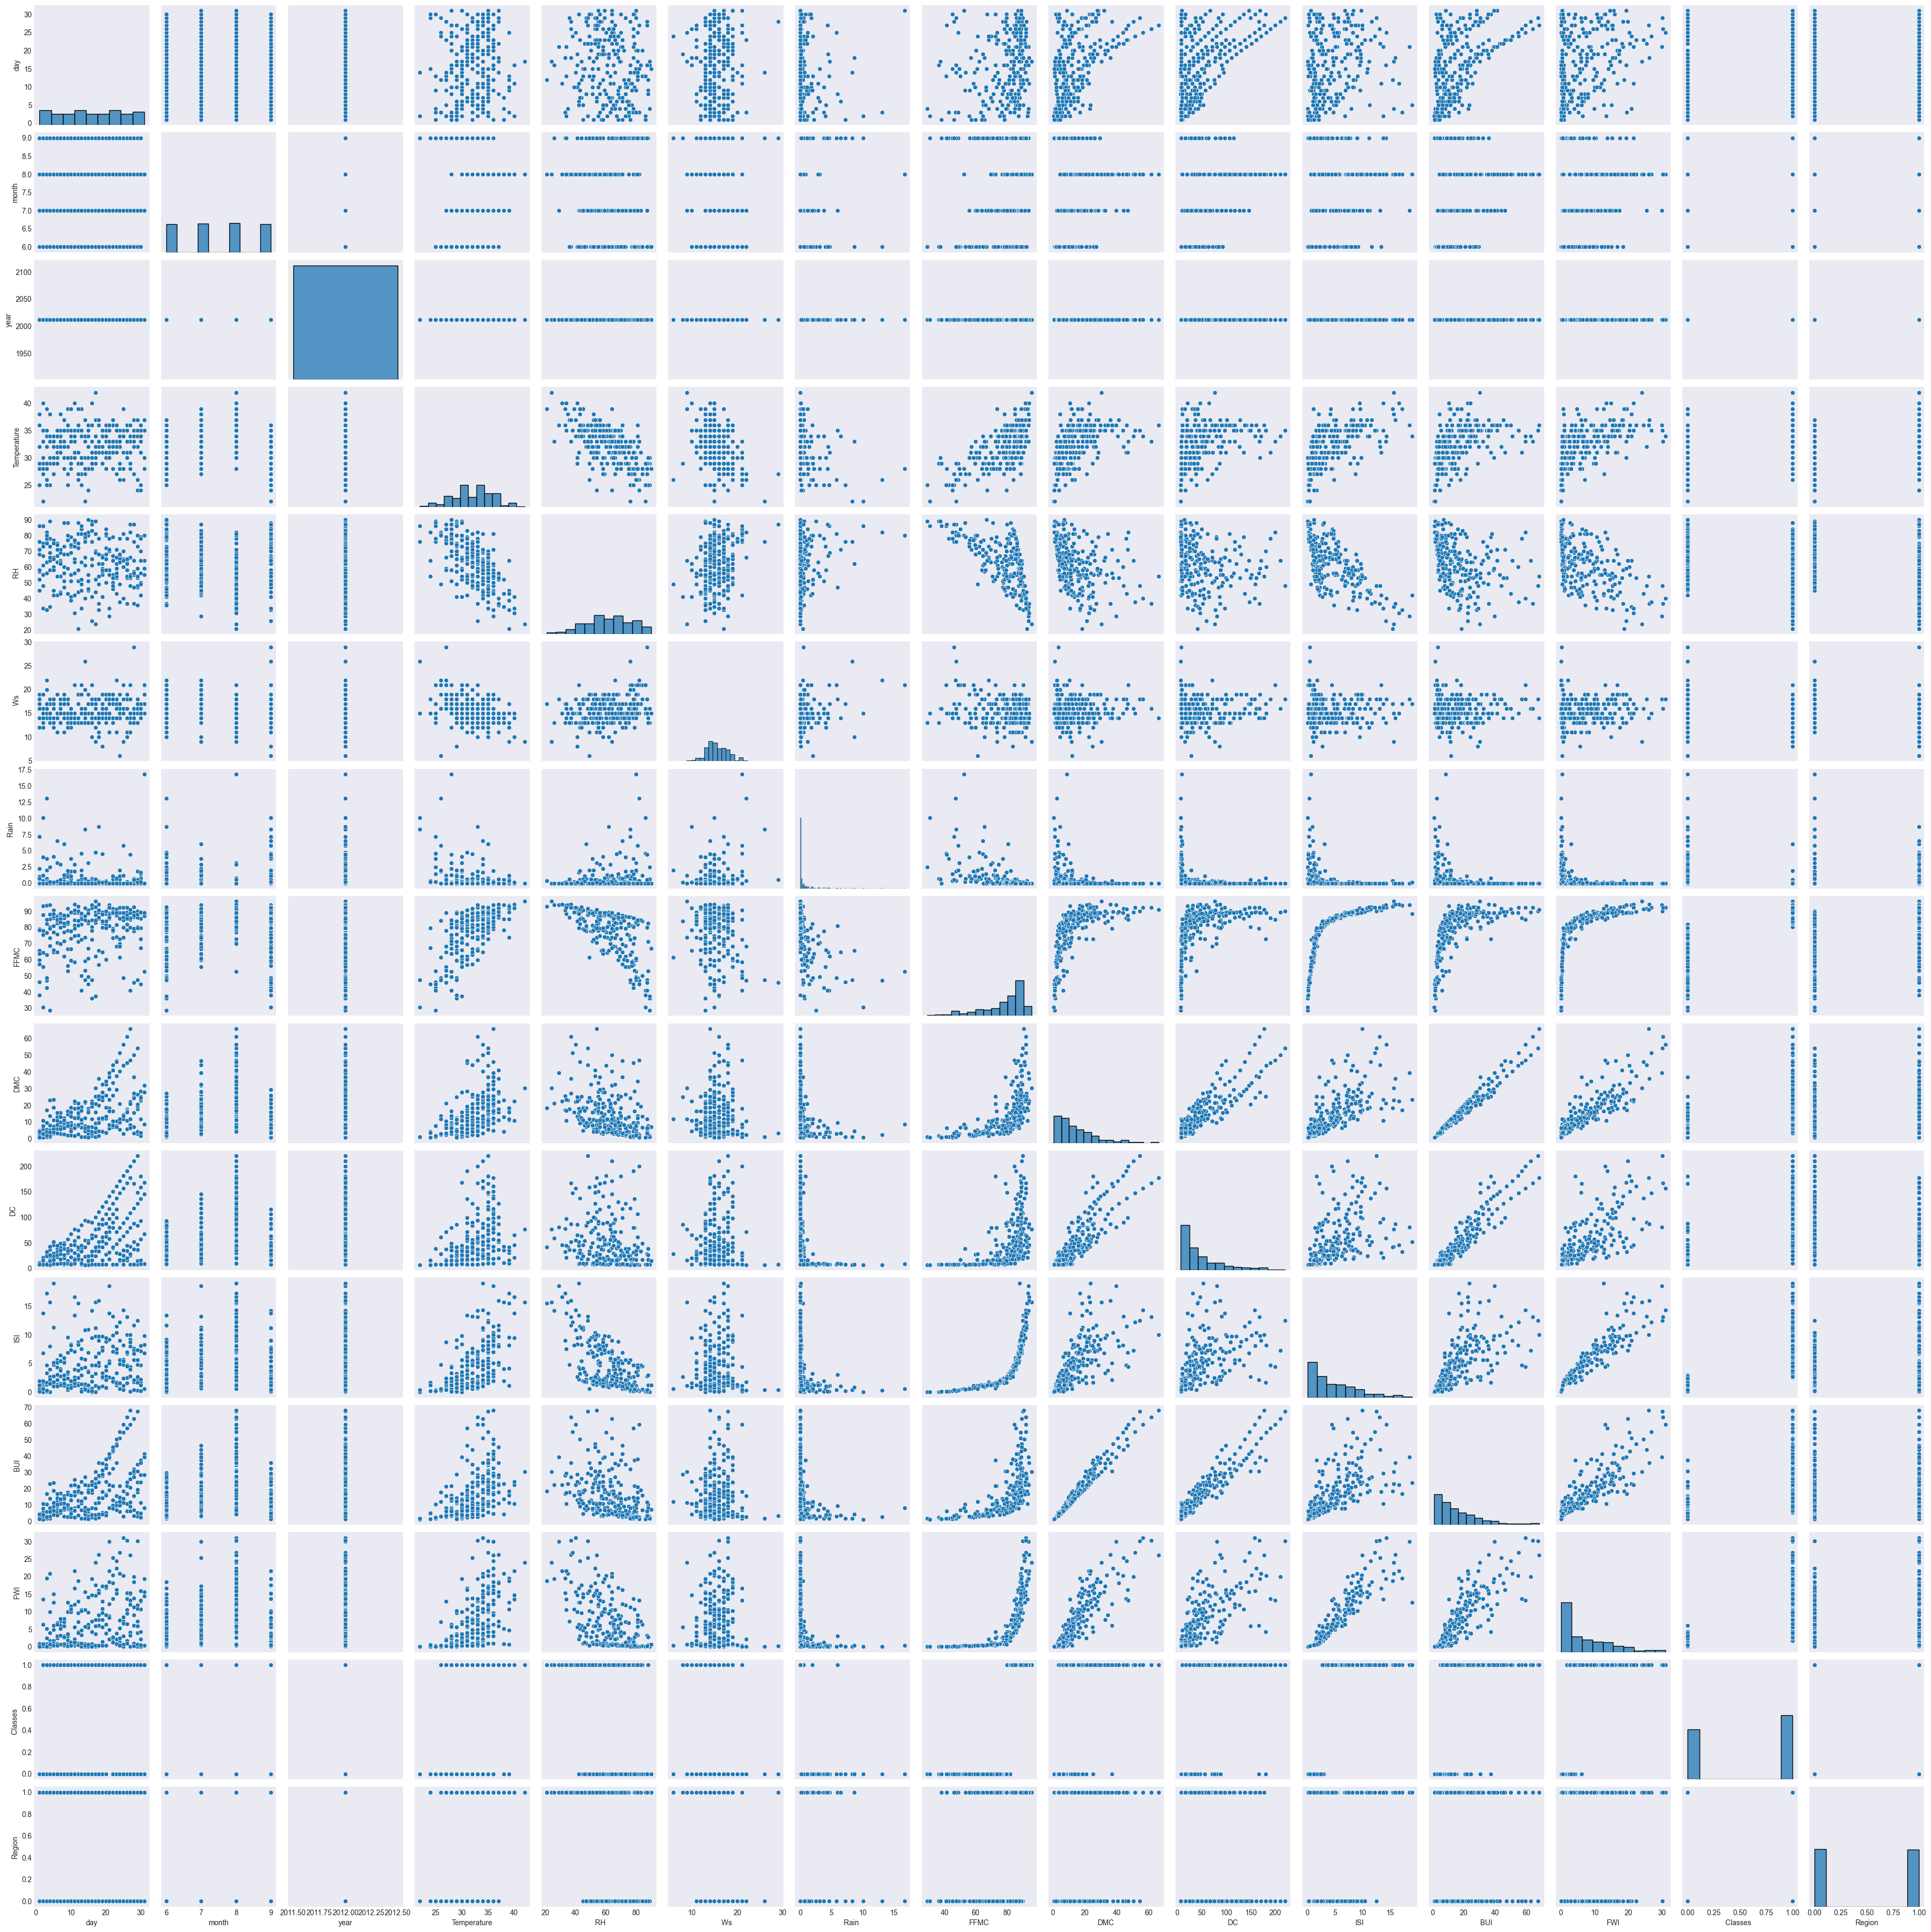

In [133]:
sns.pairplot(data=df)

<Figure size 2000x1600 with 0 Axes>

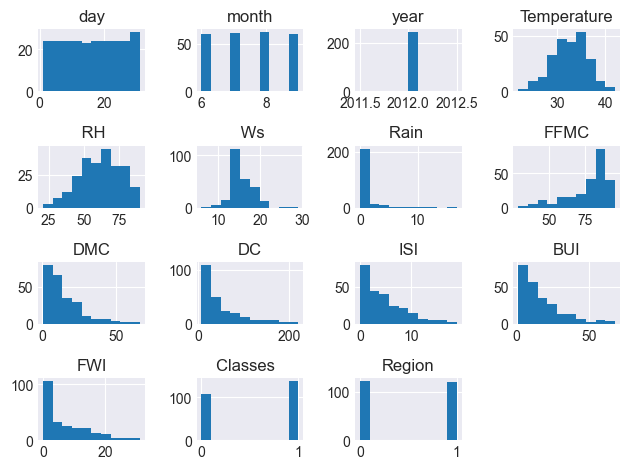

In [134]:
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(20,16))
df.hist()
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

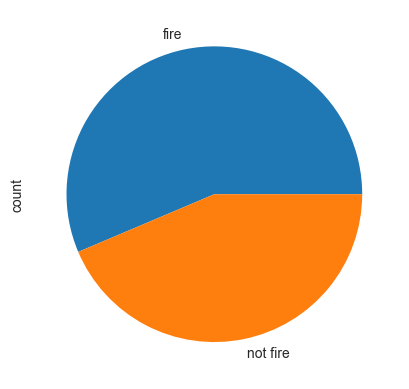

In [135]:
df['Classes  '].value_counts().plot.pie(labels=['fire','not fire'])

In [136]:
df.corr()['Classes  '].sort_values()

 RH           -0.432161
Rain          -0.379097
 Ws           -0.069964
month          0.024004
Region         0.162347
day            0.202840
DC             0.511123
Temperature    0.516015
DMC            0.585658
BUI            0.586639
FWI            0.719216
ISI            0.735197
FFMC           0.769492
Classes        1.000000
year                NaN
Name: Classes  , dtype: float64

<Axes: >

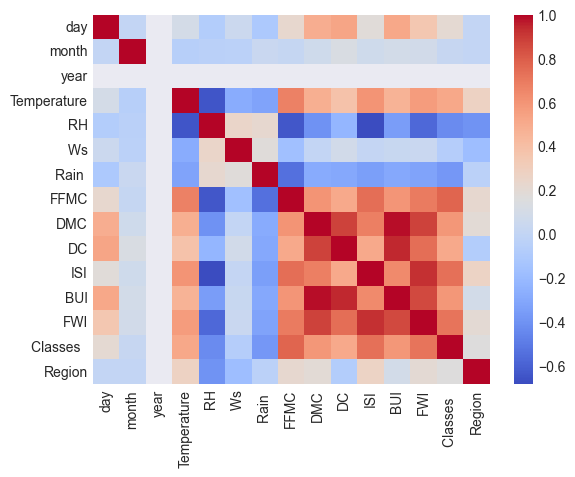

In [137]:
sns.heatmap(df.corr(),cmap='coolwarm')